## Iran's COVID-19 Statistics

In [1]:
import os
import sys

# adding classes folder to system path
sys.path.insert(0, os.path.abspath('..') + '/src')

import copy
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

from data_loader import DataReader

In [2]:
# input json files of tweets are needed for running this cell
df = DataReader().tweets_count_by_day()

## `Report 1` : Iran's Ministry of Health and Medical Education

In [4]:
cols = ["date", "Confirmed cases", "Associated death", "Recovered"]
df_iran = pd.DataFrame(columns=cols)

data_iran = [
["03-13", "11364", "514", "3529"],
["03-14", "12729", "611", "4339"],
["03-15", "13938", "724", "4590"],
["03-16", "14991", "853", "4996"],
["03-17", "16169", "988", "5389"],
["03-18", "17361", "1135", "5710"],
["03-19", "18407", "1284", "5710"],
["03-20", "19644", "1433", "6745"],
["03-21", "20610", "1556", "7635"],
["03-22", "21638", "1685", "7635"],
["03-23", "23049", "1812", "8376"],
["03-24", "24811", "1934", "8931"],
["03-25", "27017", "2077", "9625"],
["03-26", "29406", "2234", "10457"],
["03-27", "32332", "2378", "11133"],      
["03-28", "35408", "2517", "11679"],
["03-29", "38309", "2640", "12391"],
["03-30", "41495", "2757", "13911"],
["03-31", "44605", "2898", "14656"],
["04-01", "47593", "3036", "15473"],
["04-02", "50468", "3160", "16711"],
["04-03", "53183", "3294", "17935"],
["04-04", "55743", "3452", "19736"],
["04-05", "58226", "3603", "22011"],
["04-06", "60500", "3739", "24236"],
["04-07", "62589", "3872", "27039"],
["04-08", "64586", "3993", "29812"],
["04-09", "66220", "4110", "32309"],
["04-10", "68192", "4232", "35465"],
["04-11", "70029", "4357", "41947"],
["04-12", "71686", "4474", "43894"],
["04-13", "73303", "4585", "45983"],
["04-14", "74877", "4683", "48129"],
["04-15", "76389", "4777", "49933"],
["04-16", "77995", "4869", "52229"],
["04-17", "79494", "4958", "54064"],
["04-18", "80868", "5031", "55987"],
["04-19", "82211", "5118", "57023"]]

for record in data_iran:
    df_iran = df_iran.append({"date": record[0], "Confirmed cases": int(record[1]), "Associated death": int(record[2]), "Recovered": int(record[3])}, ignore_index=True)

## `Report 2` : CSSE at Johns Hopkins University

Numbers are extracted from: https://github.com/CSSEGISandData/COVID-19

In [2]:
cols = ["date", "Confirmed cases", "Associated death", "Recovered"]
df_iran = pd.DataFrame(columns=cols)

df_confirmed = pd.read_csv('../data/reports/time_series_covid19_confirmed_global.csv')
df_confirmed = df_confirmed.loc[df_confirmed['Country/Region'] == "Iran"]
df_deaths = pd.read_csv('../data/reports/time_series_covid19_deaths_global.csv')
df_deaths = df_deaths.loc[df_deaths['Country/Region'] == "Iran"]
df_recovered = pd.read_csv('../data/reports/time_series_covid19_recovered_global.csv')
df_recovered = df_recovered.loc[df_recovered['Country/Region'] == "Iran"]

exclude = ['Province/State', 'Country/Region', 'Lat', 'Long']

for idx, row in df_confirmed.iterrows():
    for col_name, col_val in row.iteritems():
        if col_name not in exclude:
            try:
                confirmed = int(col_val)
                deaths = int(df_deaths.iloc[0][col_name])
                recovered = int(df_recovered.iloc[0][col_name])
                if confirmed != 0 or deaths != 0 or recovered != 0:
                    df_iran = df_iran.append({"date": col_name, "Confirmed cases": int(col_val), "Associated death": deaths, "Recovered": recovered}, ignore_index=True)
            except Exception as e:
                print(e)
                pass

In [3]:
df_iran.tail(10)

,date,Confirmed cases,Associated death,Recovered
418,4/12/21,2093452,64764,1720084
419,4/13/21,2118212,65055,1729293
420,4/14/21,2143794,65359,1739002
421,4/15/21,2168872,65680,1749041
422,4/16/21,2194133,66008,1761497
423,4/17/21,2215445,66327,1772688
424,4/18/21,2237089,66732,1785358
425,4/19/21,2261435,67130,1797319
426,4/20/21,2286927,67525,1810531
427,4/21/21,2311813,67913,1823958


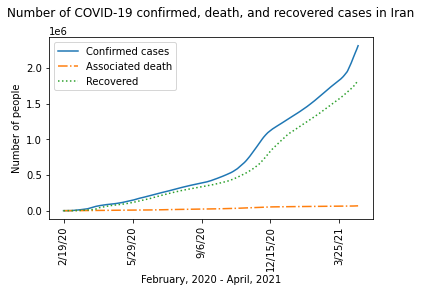

In [10]:
styles1 = ['-','-.',':']

df_iran.set_index('date').plot(style=styles1);
plt.xticks(rotation='vertical')
plt.title("Number of COVID-19 confirmed, death, and recovered cases in Iran", y=1.08)
plt.xlabel("February, 2020 - April, 2021")
plt.ylabel("Number of people")
plt.gcf().subplots_adjust(left=0.15, bottom=0.25)
plt.savefig('iran_cases.pdf', format="pdf", pad_inches=2)

# plt.ticklabel_format(style='plain')

plt.show()

## Plotting original tweets

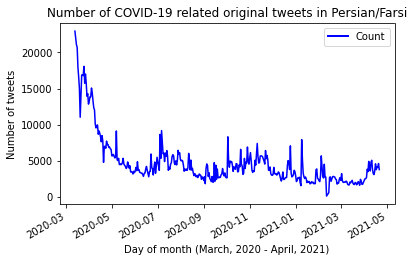

In [4]:
x = df[1:len(df)-1]
x.plot(x='created_at',y='count',color='blue')
plt.title("Number of COVID-19 related original tweets in Persian/Farsi")
plt.xlabel("Day of month (March, 2020 - April, 2021)")
plt.ylabel("Number of tweets")
plt.gcf().subplots_adjust(bottom=0.25)

# changing legend
custom_lines = [Line2D([0], [0], color="blue", lw=2)]
plt.legend(custom_lines, ['Count'])
plt.savefig('tweets_count.pdf', format="pdf", pad_inches=2)
plt.show()